(array([-1.48341]), array([ 2.0512]))

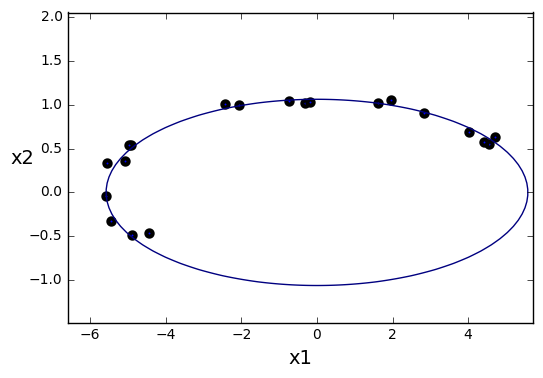

In [2]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

# import the dataset
reader = csv.reader(open("asteroid_data.csv", "rb"), delimiter=",")
d = list(reader)

# import data and reshape appropriately
data = np.array(d).astype("float")
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# transform input and ouptut
x_transformed = [s*s for s in x]
y_transformed = [s*s for s in y]

# pad with ones -- > to setup linear system
o = np.ones((len(x),1))
x_new = np.concatenate((x_transformed,y_transformed),axis = 1)

# # set up linear system to solve for weights
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += o[i]*x_new[i,:].T

# solve linear system for weights
w = np.linalg.solve(A,b)

# plot data and fit - here we use matplotlib's contour function to get the elliptical fit right in the plot
plt.scatter(x,y,linewidth = 3)
s = np.linspace(-7,7,200)
e,r = np.meshgrid(s,s)
z = e*e*w[0] + r*r*w[1] - 1
plt.contour(e,r,z,levels = [0])

# clean up plot
plt.xlabel('x1',fontsize =14)
plt.ylabel('x2',rotation = 0,fontsize = 14)
plt.xlim([min(x)-1,max(x)+1])
plt.ylim([min(y)-1,max(y)+1])